In [1]:
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

Extracting frames from video

In [2]:
def FrameCapture(path): 
    os.mkdir("Frames")
    vidObj = cv2.VideoCapture(path) 

    q = 0
  
    success = 1
  
    while success: 
  
        success, image = vidObj.read() 
  
        try:
          cv2.imwrite("Frames/frame"+str(q)+".jpg", image) 
        except:
          pass
  
        q=q+1
FrameCapture("/content/1615363610851.mp4")

List to store the image

In [4]:
col_frames = os.listdir('Frames/')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('Frames/'+i)
    # append the frames to the list
    col_images.append(img)

Check frames

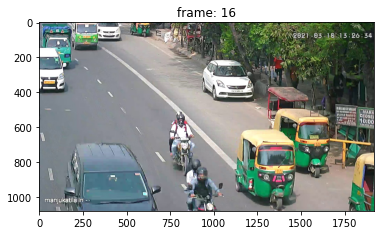

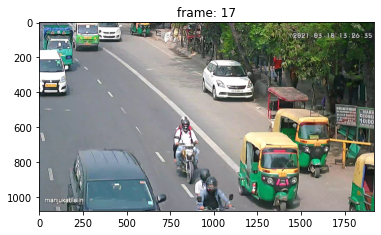

In [ ]:
def check(i):
  for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()
check(16)

Taking the difference of pixel values of two consecutive frames

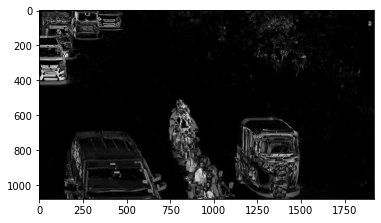

In [ ]:
def grayscale(i):
  grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
  
  plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
  plt.show()
grayscale(16)

Image preprocessing

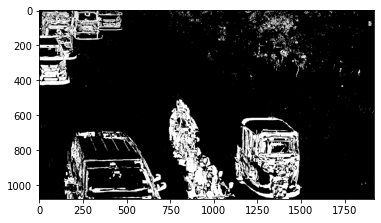

In [ ]:
grayA = cv2.cvtColor(col_images[16], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[17], cv2.COLOR_BGR2GRAY)
diff_image = cv2.absdiff(grayB, grayA)

ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap = 'gray')
plt.show()

Image Dialation

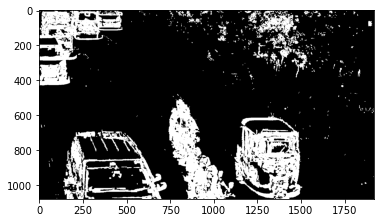

In [ ]:
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

plt.imshow(dilated, cmap = 'gray')
plt.show()

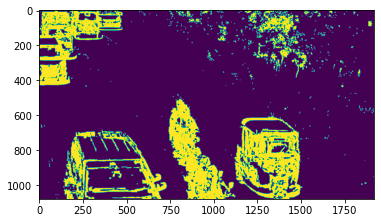

In [ ]:
plt.imshow(dilated)
cv2.line(dilated, (0, 80),(256,80),(100, 0, 0))
plt.show()

Find contours

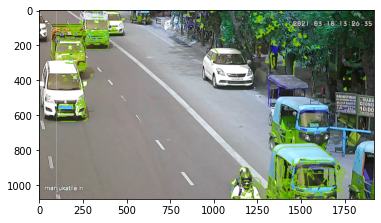

In [11]:
def isLeft(x1,y1,x2,y2,x,y):
     return ((x2 - x1)*(y - y1) - (y2 - y1)*(x - x1)) > 0;
def bound(x1,y1,x2,y2,frame_number):
  col_frames = os.listdir('Frames/')
  col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))
  col_images=[]

  for i in col_frames:
    # read the frames
    img = cv2.imread('Frames/'+i)
    # append the frames to the list
    col_images.append(img)
  
  grayA = cv2.cvtColor(col_images[frame_number-1], cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(col_images[frame_number], cv2.COLOR_BGR2GRAY)
  diff_image = cv2.absdiff(grayB, grayA)
  ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  valid_cntrs = []
  
  for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if isLeft(x1,y1,x2,y2,x,y) and cv2.contourArea(cntr) >= 40:
      valid_cntrs.append(cntr)
  dmy = col_images[frame_number-1].copy()
  
  cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
  cv2.line(dmy, (x1, y1),(x2,y2),(1000, 2555, 2555))
  plt.imshow(dmy)
  plt.show()
  cv2.imwrite("Frames_Output"+str(i)+'.png',dmy)
bound(100,2000,100,0,26)

User Input

/content/1615363610851.mp4
100 2000 100 0
26


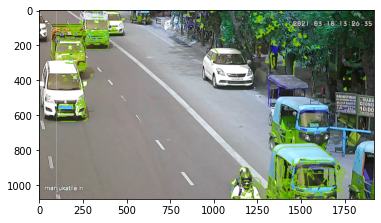

In [15]:
path=input()
FrameCapture(path)
x1,y1,x2,y2=list(map(int,input().split()))
frame_number=int(input())
bound(x1,y1,x2,y2,frame_number)

Input video

In [15]:
col_frames = os.listdir('Frames/')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))
path=input()
FrameCapture(path)
x1,y1,x2,y2=list(map(int,input().split()))
for i in range(len(col_frames)):
  bound(x1,y1,x2,y2,i)